In [23]:
# Kamron Aggor
# DSP 310 Spring '25
# Homework 2 - Jupyter Notebook: Code and Markdown

# General Solution
# Find the following information about TWO unique datasets:
# i) Column and row count?

# ii) Categorical, numerical, or a mix of both?

# iii) Are there cols that don't provide any information?

# iv) Compute the mode of categorical cols, compute the mean (average), max, and min values, as well as
#     a histogram of the numerical columns, being sure to comment on what kind of distribution it is (normal, multi-modal, etc.)

# v) Plot bar plots for categorical columns and comment on whether the data set is balanced in terms of the representation of the 
#     various labels in the categorical columns

In [24]:
# imports
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt


# Dataset 1 - Wine Quality
# fetch dataset (code directly copied from website)
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [25]:
# This cell is to check the data and ensure that the data is good to use.

# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

# The data isn't in a DF format, so we need to convert it by analyzing the join axes nodes using pd.concat() method
# Prep for joining
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

# Concat
wine_quality = pd.concat([X,y], axis=1) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

This analysis already helps us answer 
**Question iii) 'Are there cols that don't provide any information?'**
as well as
**Question ii) 'Categorical, numerical, or a mix of both?'**

The reason for ii) is because in the 'type' column of the metadata we see that column indexes 0-11 are continuous/integer values, and index 12 is a Categorical type. ***Therefore, we know that this dataset is a mix of numerical and categorical.***

The reason for iii) is because the 'missing values' column is all 'no', as well as because of the fact that each of the columns indicate some information that is directly related to the analysis being conducted. There is no 'id' column which would not really tell us anything about the data.

In [26]:
# check to make sure dataframe is good
wine_quality.head(20) # good

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### After fetching the data, we need to go about answering the questions for the assignment:

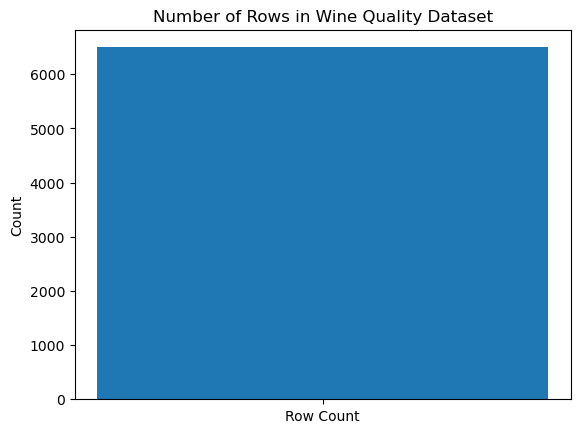

Row Count: 6497


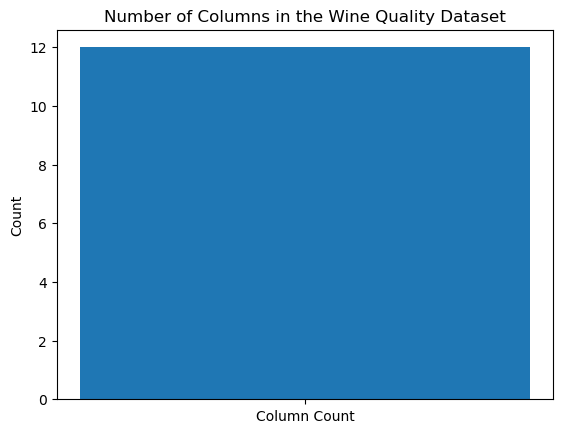

Column Count: 12


In [27]:
# i) What is the column and row count of the data?

# Since the data that has been fetched is now in a DF format, the rest should be simple

# Rows
row_count = wine_quality.shape[0]

# Cols
col_count = wine_quality.shape[1]


# Use a chart to make things more readable
plt.bar("Row Count", row_count)
plt.title("Number of Rows in Wine Quality Dataset")
plt.ylabel("Count")
plt.show()
print(f'Row Count: {row_count}')

plt.bar("Column Count", col_count)
plt.title("Number of Columns in the Wine Quality Dataset")
plt.ylabel("Count")
plt.show()
print(f'Column Count: {col_count}')


We can surmise that there are **6497 rows and 12 columns in the dataset** based on this chart, but for some reason the metadata lists a 13th 'color' column that I'm unsure how to list using Python...

In [28]:
# ii) Is the data categorical, numerical, or a mix of both?

# we can check by using the 'dtype' attribute, which assigns 'int' and 'category' labels on a columnal basis. 
for col in wine_quality.columns:
    print(f"Column '{col}' has {wine_quality[col].dtype} datatype. \n" )

Column 'fixed_acidity' has float64 datatype. 

Column 'volatile_acidity' has float64 datatype. 

Column 'citric_acid' has float64 datatype. 

Column 'residual_sugar' has float64 datatype. 

Column 'chlorides' has float64 datatype. 

Column 'free_sulfur_dioxide' has float64 datatype. 

Column 'total_sulfur_dioxide' has float64 datatype. 

Column 'density' has float64 datatype. 

Column 'pH' has float64 datatype. 

Column 'sulphates' has float64 datatype. 

Column 'alcohol' has float64 datatype. 

Column 'quality' has int64 datatype. 



Since each column holds numerical values only, **the dataset is a numerical dataset.**

Column 'fixed_acidity' mean: 7.215307064799134
Column 'fixed_acidity' maximum: 15.9
Column 'fixed_acidity' minimum: 3.8
Column 'fixed_acidity' distribution: Left-skewed


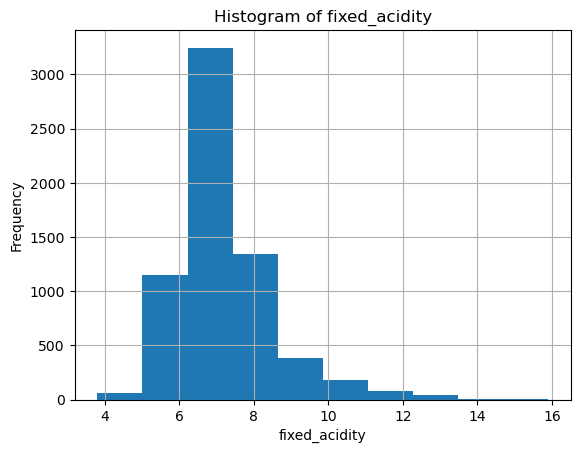

Column 'volatile_acidity' mean: 0.33966599969217015
Column 'volatile_acidity' maximum: 1.58
Column 'volatile_acidity' minimum: 0.08
Column 'volatile_acidity' distribution: Left-skewed


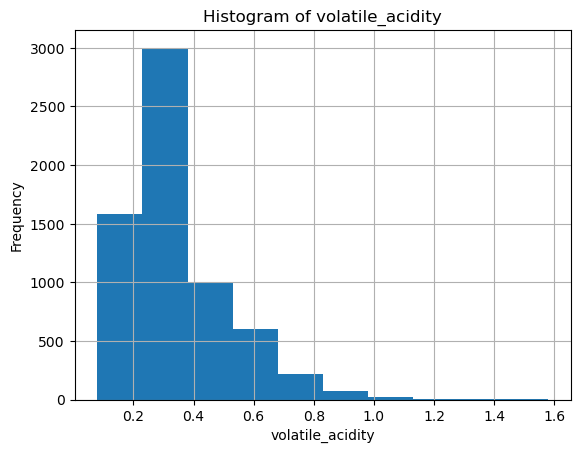

Column 'citric_acid' mean: 0.3186332153301454
Column 'citric_acid' maximum: 1.66
Column 'citric_acid' minimum: 0.0
Column 'citric_acid' distribution: Normal


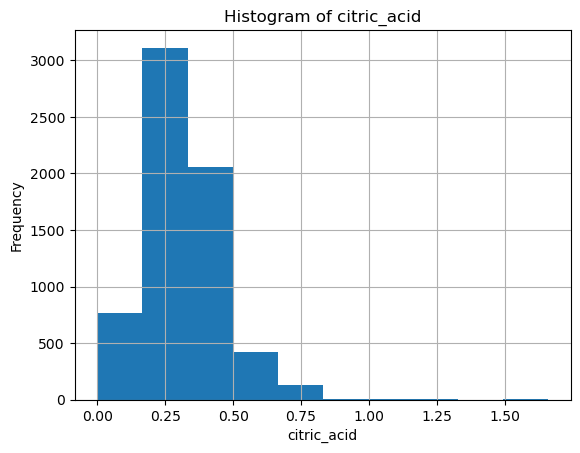

Column 'residual_sugar' mean: 5.4432353393874156
Column 'residual_sugar' maximum: 65.8
Column 'residual_sugar' minimum: 0.6
Column 'residual_sugar' distribution: Left-skewed


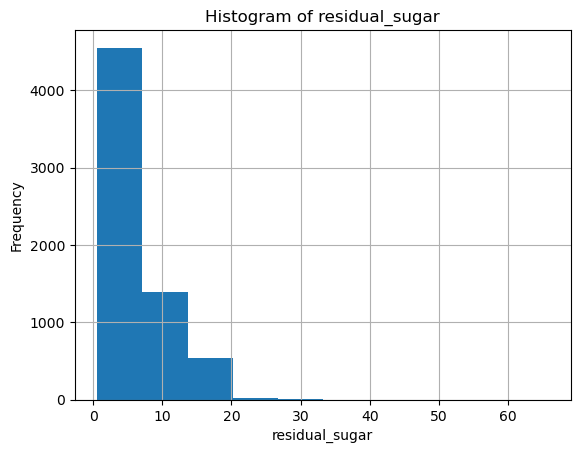

Column 'chlorides' mean: 0.0560338617823606
Column 'chlorides' maximum: 0.611
Column 'chlorides' minimum: 0.009
Column 'chlorides' distribution: Left-skewed


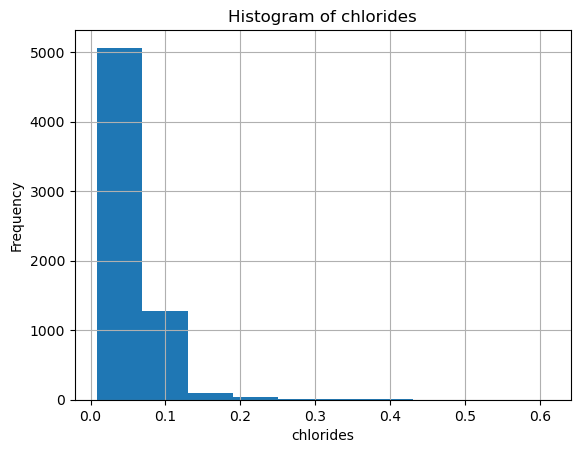

Column 'free_sulfur_dioxide' mean: 30.525319378174544
Column 'free_sulfur_dioxide' maximum: 289.0
Column 'free_sulfur_dioxide' minimum: 1.0
Column 'free_sulfur_dioxide' distribution: Left-skewed


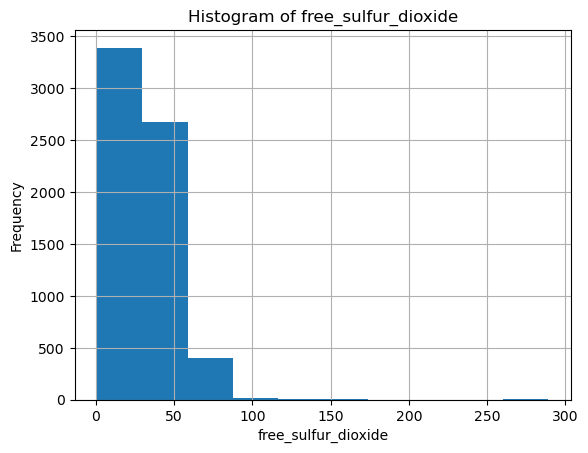

Column 'total_sulfur_dioxide' mean: 115.7445744189626
Column 'total_sulfur_dioxide' maximum: 440.0
Column 'total_sulfur_dioxide' minimum: 6.0
Column 'total_sulfur_dioxide' distribution: Normal


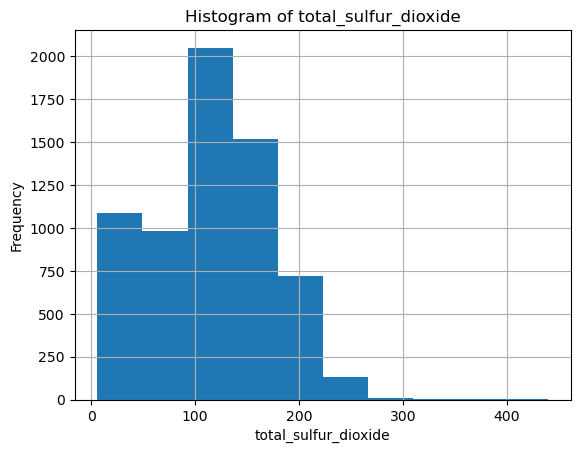

Column 'density' mean: 0.9946966338309922
Column 'density' maximum: 1.03898
Column 'density' minimum: 0.98711
Column 'density' distribution: Left-skewed


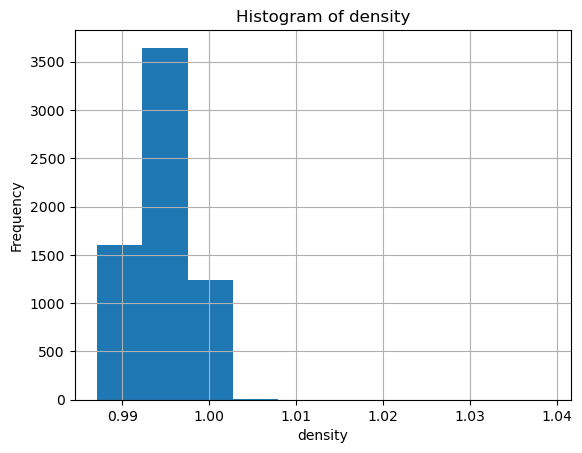

Column 'pH' mean: 3.2185008465445644
Column 'pH' maximum: 4.01
Column 'pH' minimum: 2.72
Column 'pH' distribution: Normal


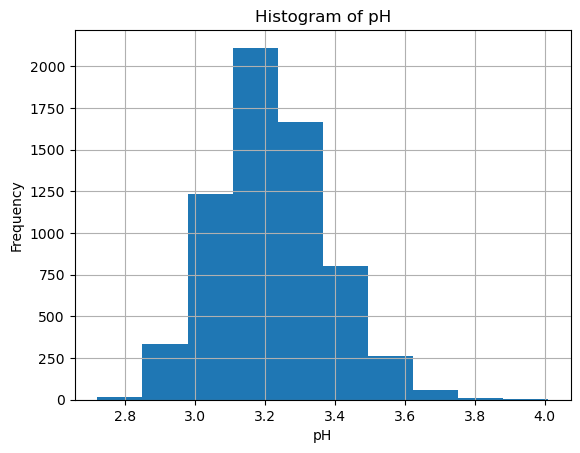

Column 'sulphates' mean: 0.5312682776666163
Column 'sulphates' maximum: 2.0
Column 'sulphates' minimum: 0.22
Column 'sulphates' distribution: Left-skewed


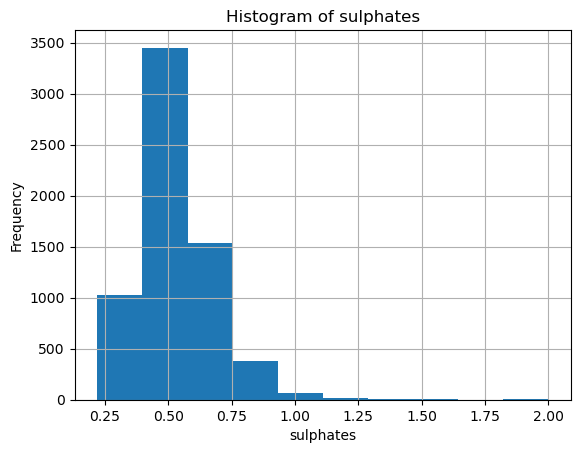

Column 'alcohol' mean: 10.491800831149478
Column 'alcohol' maximum: 14.9
Column 'alcohol' minimum: 8.0
Column 'alcohol' distribution: Left-skewed


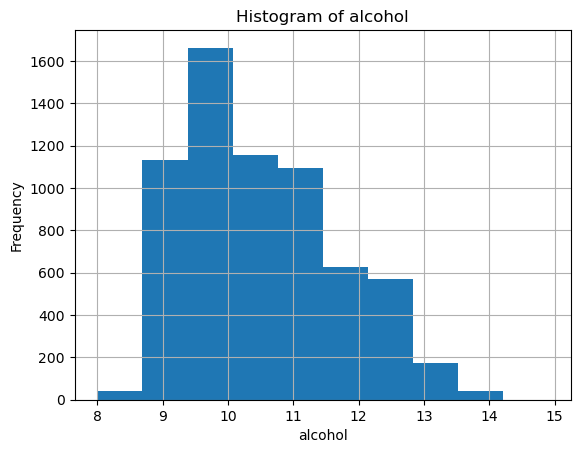

Column 'quality' mean: 5.818377712790519
Column 'quality' maximum: 9
Column 'quality' minimum: 3
Column 'quality' distribution: Normal


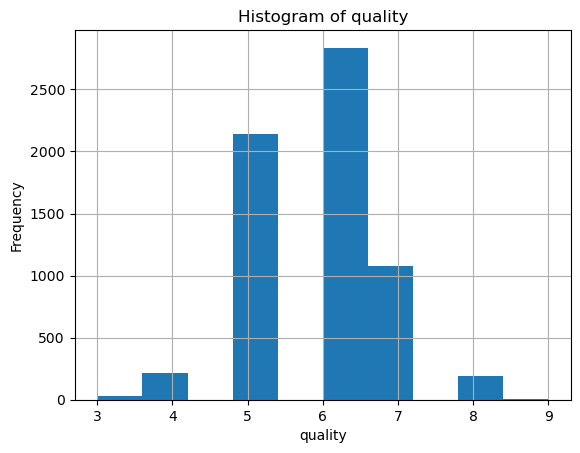

In [29]:
# iv) Compute the mode of categorical cols, compute the mean (average), max, and min values, as well as
#     a histogram of the numerical columns, being sure to comment on what kind of distribution it is (normal, multi-modal, etc.)

# To figure out how to check the skewness I referenced this article: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
from scipy.stats import skew

# Compute stats
for col in wine_quality.columns:
    # Calculating values
    print(f"Column '{col}' mean: {wine_quality[col].mean()}")
    print(f"Column '{col}' maximum: {wine_quality[col].max()}")
    print(f"Column '{col}' minimum: {wine_quality[col].min()}")
    if skew(wine_quality[col]) < -.5: # |.5| is an arbitrary margin of error
        print(f"Column '{col}' distribution: Right-skewed")
    if skew(wine_quality[col]) > .5:
        print(f"Column '{col}' distribution: Left-skewed")
    else:
        print(f"Column '{col}' distribution: Normal")
    
    # Histogram
    plt.hist(wine_quality[col])
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

Although the metadata does display a 'color' column, When looking over wine_quality.data.features it is not present. As such, I am unsure/unable to retrieve the data for use. This dataset is effectively numerical, and thus Question v) N/A.

## Second Dataset - Student Performance

In [30]:
# Dataset 2 - Student Performance
 
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [31]:
# concat
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

student_performance = pd.concat([X,y], axis=1)

# This is to check the data and ensure that the data is good to use.

student_performance.head(20) # Good

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


### After fetching the data, we need to go about answering the questions for the assignment:

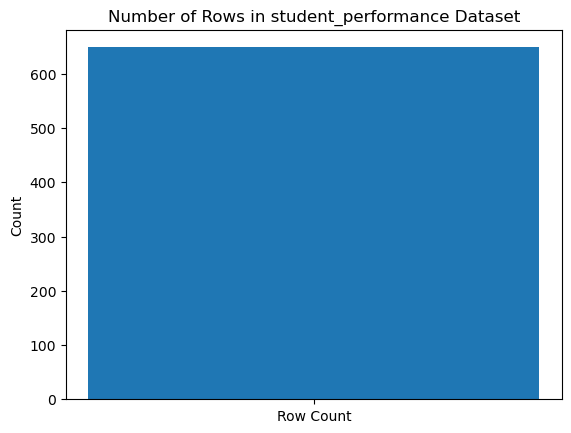

Row Count: 649


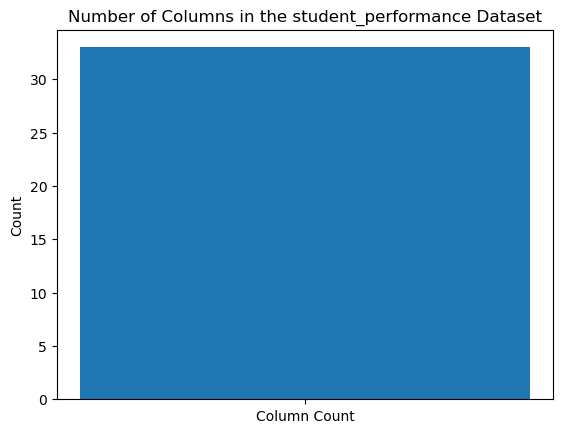

Column Count: 33


In [32]:
# i) What is the column and row count?

# Rows
row_count = student_performance.shape[0]

# Cols
col_count = student_performance.shape[1]


# Use a chart to make things more readable
plt.bar("Row Count", row_count)
plt.title("Number of Rows in student_performance Dataset")
plt.ylabel("Count")
plt.show()
print(f'Row Count: {row_count}')

plt.bar("Column Count", col_count)
plt.title("Number of Columns in the student_performance Dataset")
plt.ylabel("Count")
plt.show()
print(f'Column Count: {col_count}')


We can conclude that the student_performance dataset contains **649 rows and 33 columns.**

In [33]:
# ii) Categorical, numerical, or a mix of both?

# run check
for col in student_performance.columns:
    print(f"Column '{col}' has {student_performance[col].dtype} datatype. \n" )

Column 'school' has object datatype. 

Column 'sex' has object datatype. 

Column 'age' has int64 datatype. 

Column 'address' has object datatype. 

Column 'famsize' has object datatype. 

Column 'Pstatus' has object datatype. 

Column 'Medu' has int64 datatype. 

Column 'Fedu' has int64 datatype. 

Column 'Mjob' has object datatype. 

Column 'Fjob' has object datatype. 

Column 'reason' has object datatype. 

Column 'guardian' has object datatype. 

Column 'traveltime' has int64 datatype. 

Column 'studytime' has int64 datatype. 

Column 'failures' has int64 datatype. 

Column 'schoolsup' has object datatype. 

Column 'famsup' has object datatype. 

Column 'paid' has object datatype. 

Column 'activities' has object datatype. 

Column 'nursery' has object datatype. 

Column 'higher' has object datatype. 

Column 'internet' has object datatype. 

Column 'romantic' has object datatype. 

Column 'famrel' has int64 datatype. 

Column 'freetime' has int64 datatype. 

Column 'goout' has in

Due to the mix of integer and object (or mixed numerical and character) datatypes, we can conlcude that the dataset is ***a combination of both numerical and categorical data.***

In [34]:
# iii) Are there any columns that don't provide any information?

# Earlier I used the metadata to come to a conclusion, but one may also use a filtered subset of the data to reach a conclusion:
student_null = student_performance[student_performance.isnull().any(axis=1)]

print(student_null)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


Since we are returned an empty dataframe and there is no 'id' column, we can say that ***there are no columns that don't provide any information.***

The mode for the values in school is 0    226
1    423
Name: school, dtype: int64. 



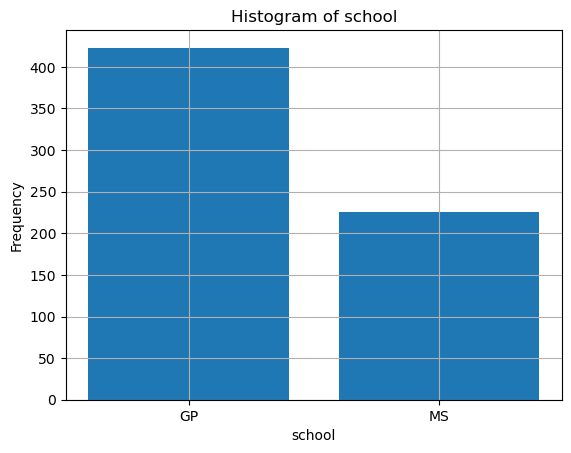

The mode for the values in sex is 0    266
1    383
Name: sex, dtype: int64. 



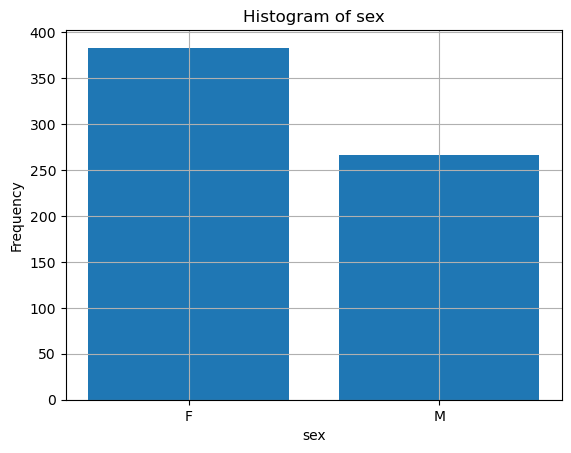

Column 'age' mean: 16.7442218798151
Column 'age' maximum: 22
Column 'age' minimum: 15
Column 'age' distribution: Normal


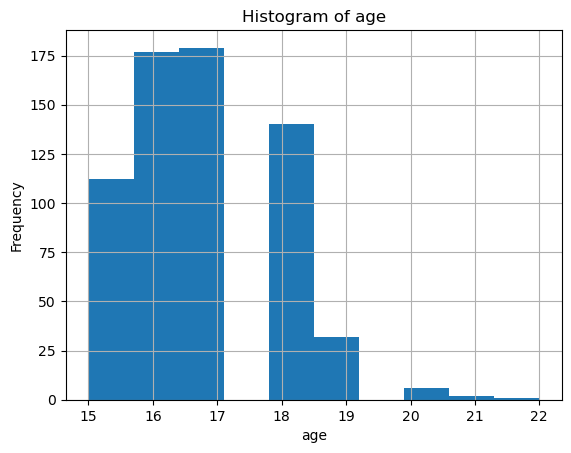

The mode for the values in address is 0    197
1    452
Name: address, dtype: int64. 



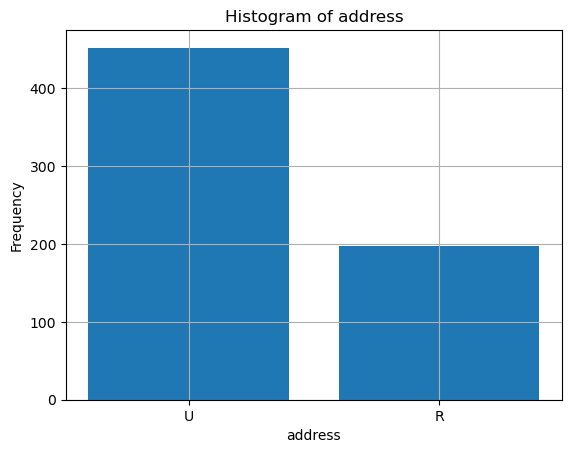

The mode for the values in famsize is 0    192
1    457
Name: famsize, dtype: int64. 



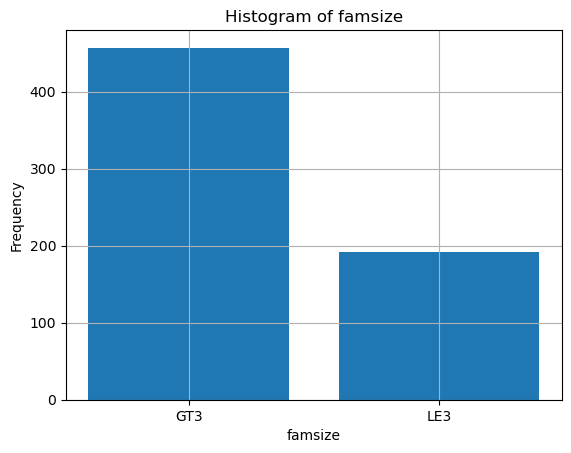

The mode for the values in Pstatus is 0     80
1    569
Name: Pstatus, dtype: int64. 



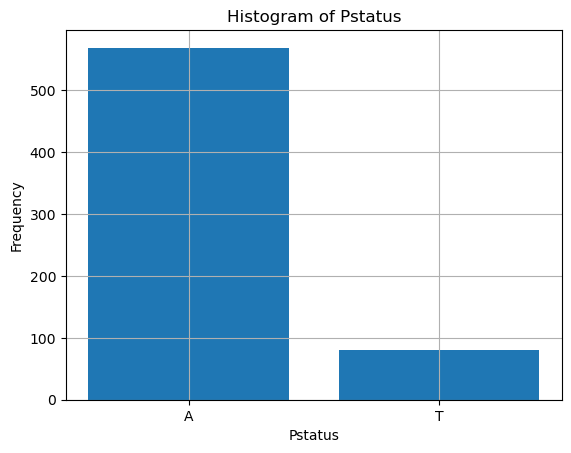

Column 'Medu' mean: 2.514637904468413
Column 'Medu' maximum: 4
Column 'Medu' minimum: 0
Column 'Medu' distribution: Normal


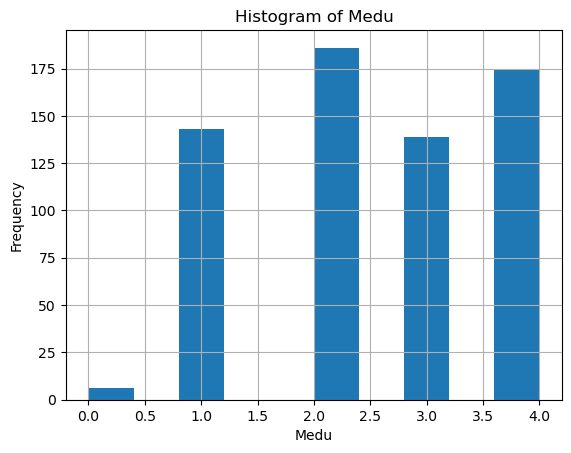

Column 'Fedu' mean: 2.3066255778120186
Column 'Fedu' maximum: 4
Column 'Fedu' minimum: 0
Column 'Fedu' distribution: Normal


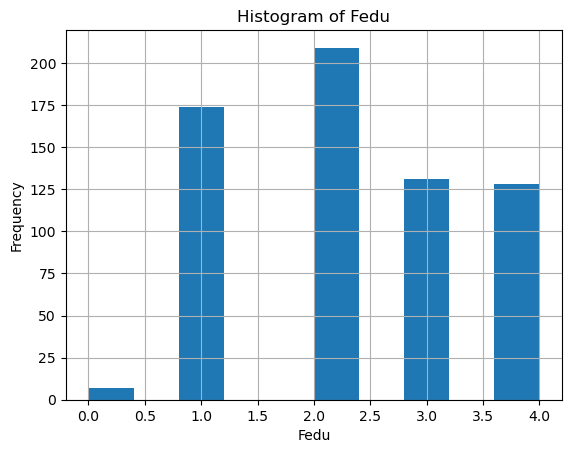

The mode for the values in Mjob is 0     48
1     72
2    135
3    136
4    258
Name: Mjob, dtype: int64. 



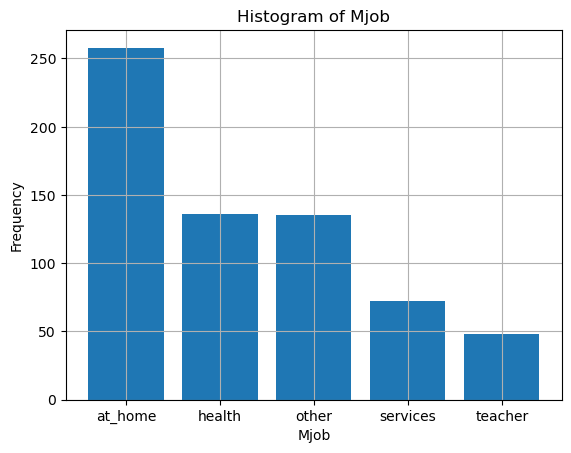

The mode for the values in Fjob is 0     23
1     36
2     42
3    181
4    367
Name: Fjob, dtype: int64. 



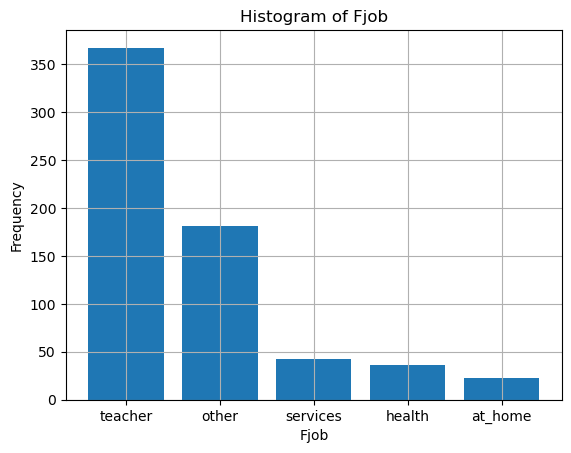

The mode for the values in reason is 0     72
1    143
2    149
3    285
Name: reason, dtype: int64. 



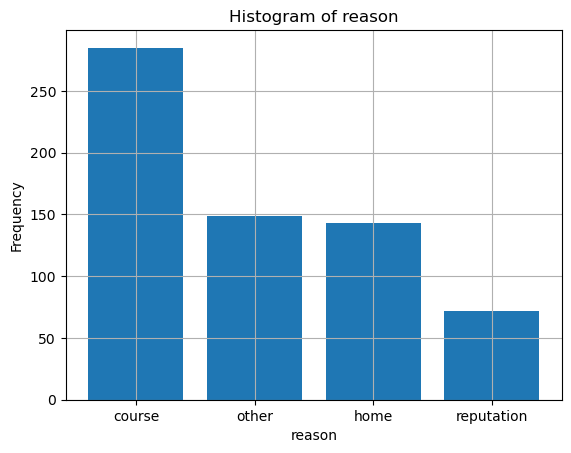

The mode for the values in guardian is 0     41
1    153
2    455
Name: guardian, dtype: int64. 



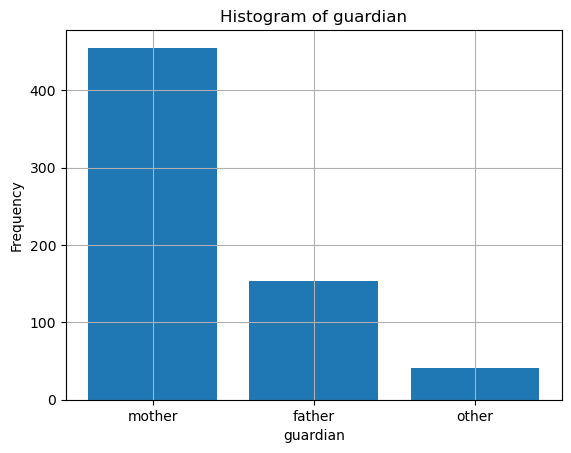

Column 'traveltime' mean: 1.568567026194145
Column 'traveltime' maximum: 4
Column 'traveltime' minimum: 1
Column 'traveltime' distribution: Left-skewed


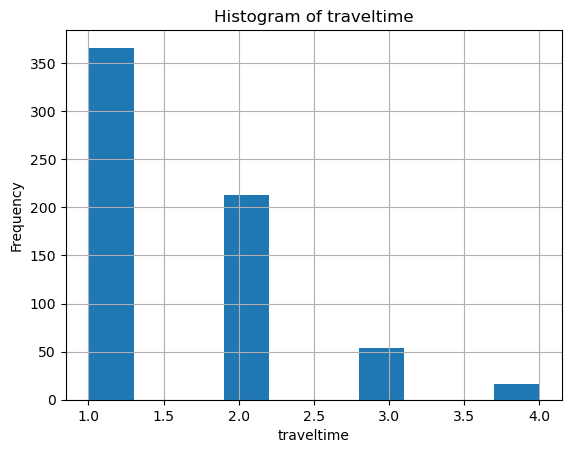

Column 'studytime' mean: 1.9306625577812018
Column 'studytime' maximum: 4
Column 'studytime' minimum: 1
Column 'studytime' distribution: Left-skewed


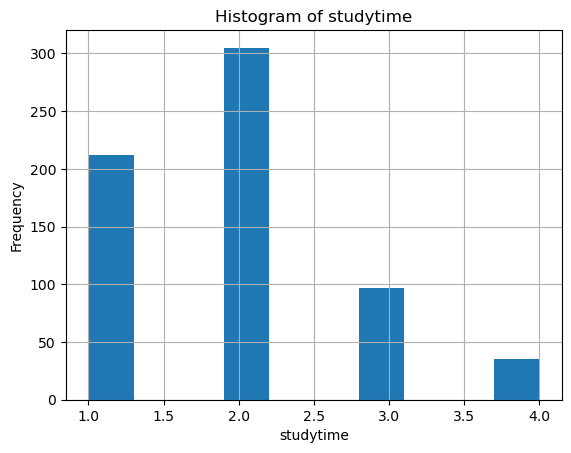

Column 'failures' mean: 0.2218798151001541
Column 'failures' maximum: 3
Column 'failures' minimum: 0
Column 'failures' distribution: Left-skewed


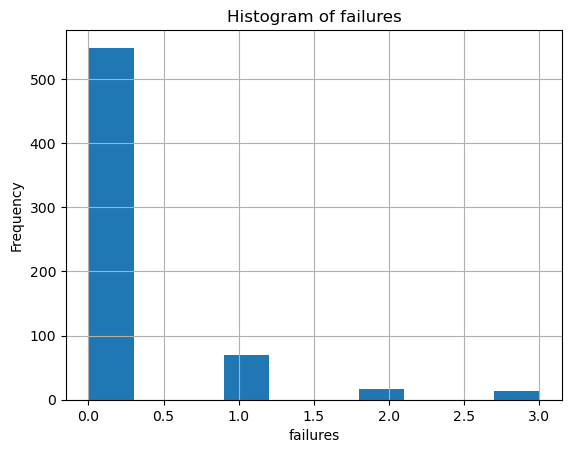

The mode for the values in schoolsup is 0     68
1    581
Name: schoolsup, dtype: int64. 



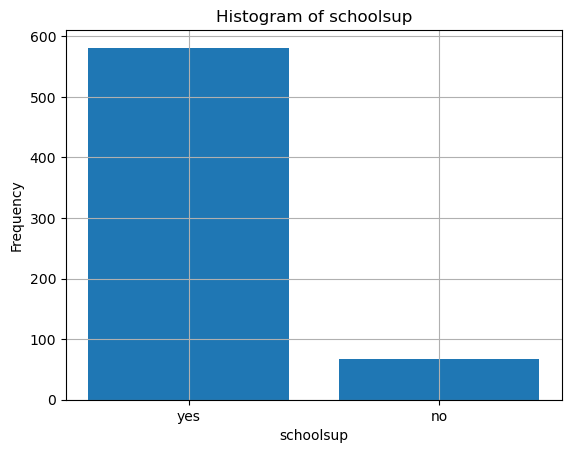

The mode for the values in famsup is 0    251
1    398
Name: famsup, dtype: int64. 



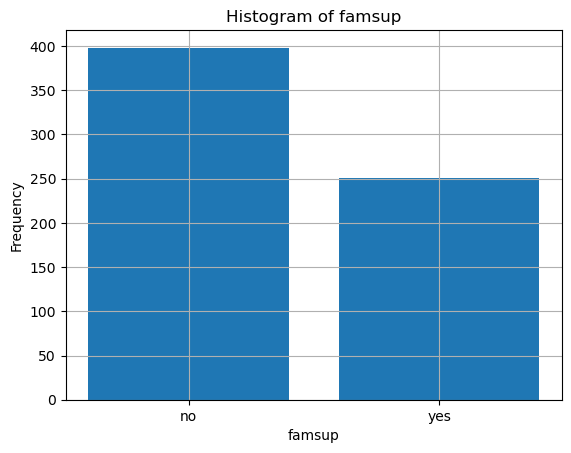

The mode for the values in paid is 0     39
1    610
Name: paid, dtype: int64. 



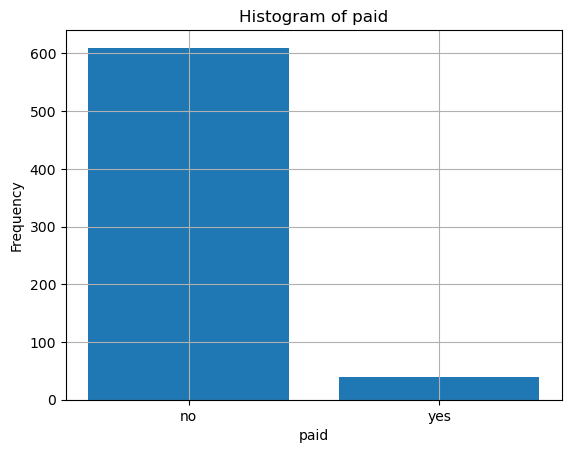

The mode for the values in activities is 0    315
1    334
Name: activities, dtype: int64. 



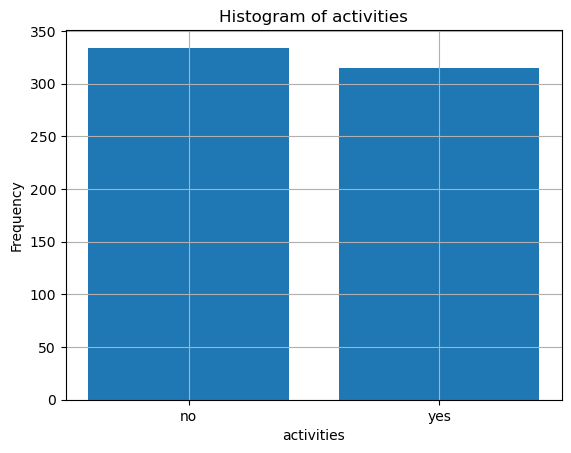

The mode for the values in nursery is 0    128
1    521
Name: nursery, dtype: int64. 



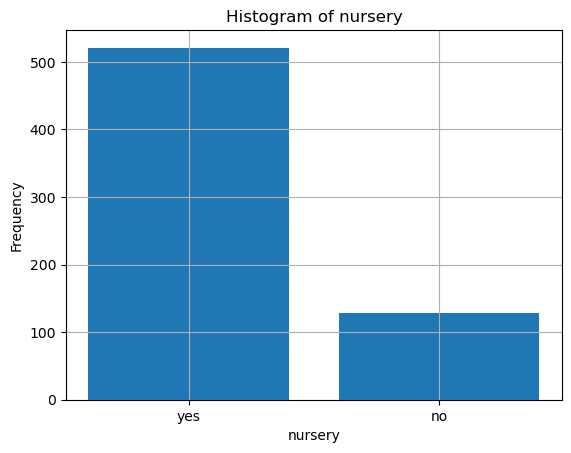

The mode for the values in higher is 0     69
1    580
Name: higher, dtype: int64. 



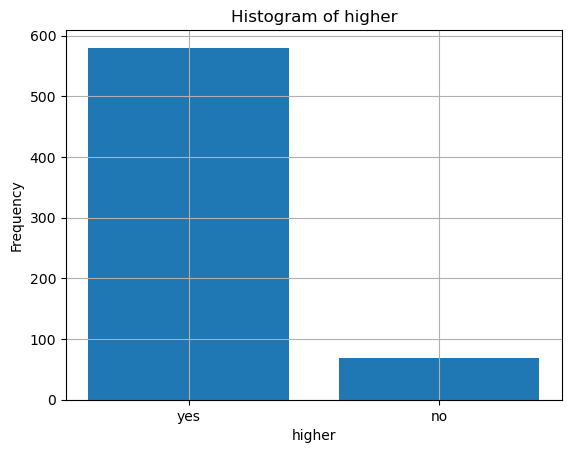

The mode for the values in internet is 0    151
1    498
Name: internet, dtype: int64. 



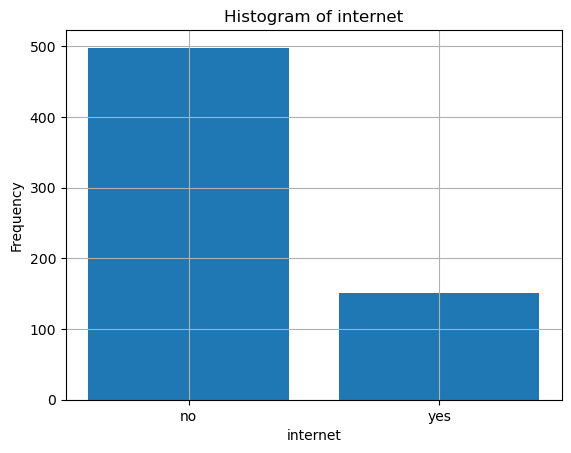

The mode for the values in romantic is 0    239
1    410
Name: romantic, dtype: int64. 



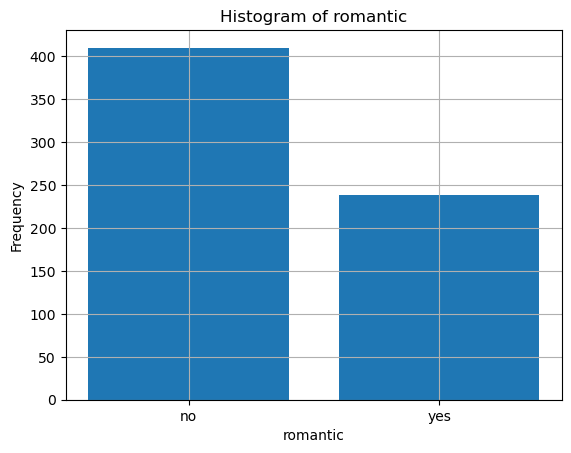

Column 'famrel' mean: 3.930662557781202
Column 'famrel' maximum: 5
Column 'famrel' minimum: 1
Column 'famrel' distribution: Right-skewed
Column 'famrel' distribution: Normal


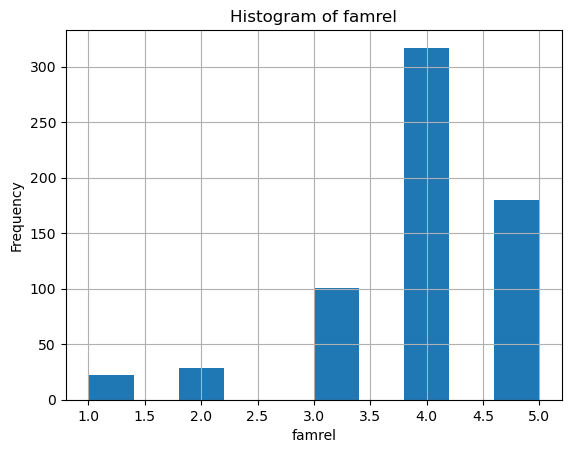

Column 'freetime' mean: 3.180277349768875
Column 'freetime' maximum: 5
Column 'freetime' minimum: 1
Column 'freetime' distribution: Normal


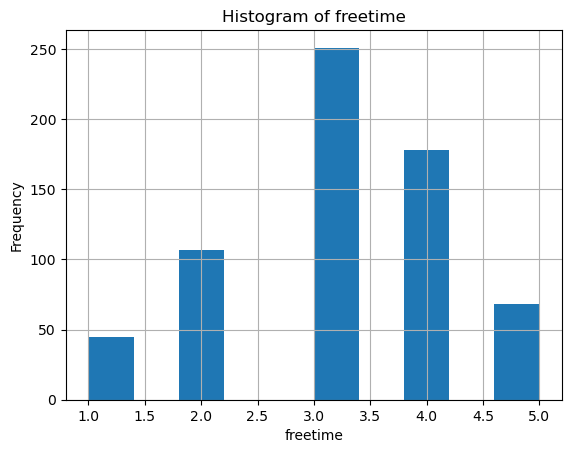

Column 'goout' mean: 3.184899845916795
Column 'goout' maximum: 5
Column 'goout' minimum: 1
Column 'goout' distribution: Normal


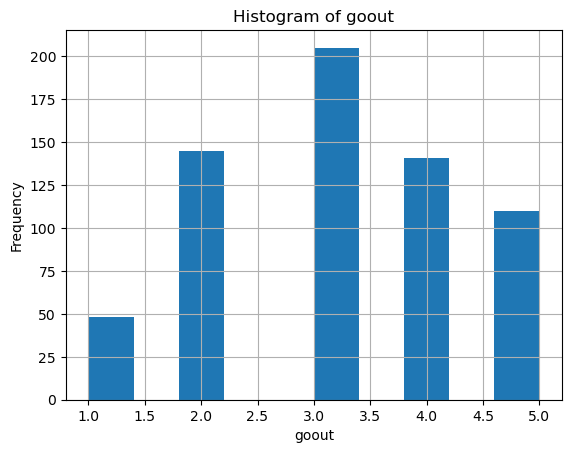

Column 'Dalc' mean: 1.50231124807396
Column 'Dalc' maximum: 5
Column 'Dalc' minimum: 1
Column 'Dalc' distribution: Left-skewed


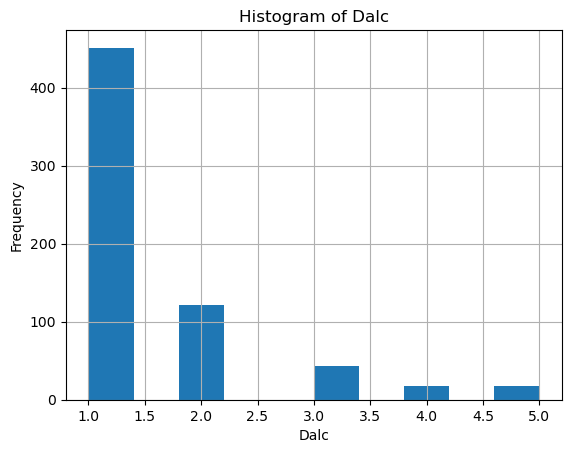

Column 'Walc' mean: 2.280431432973806
Column 'Walc' maximum: 5
Column 'Walc' minimum: 1
Column 'Walc' distribution: Left-skewed


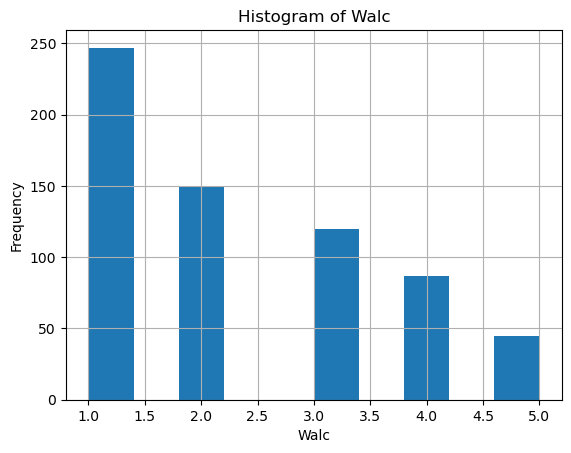

Column 'health' mean: 3.536209553158706
Column 'health' maximum: 5
Column 'health' minimum: 1
Column 'health' distribution: Normal


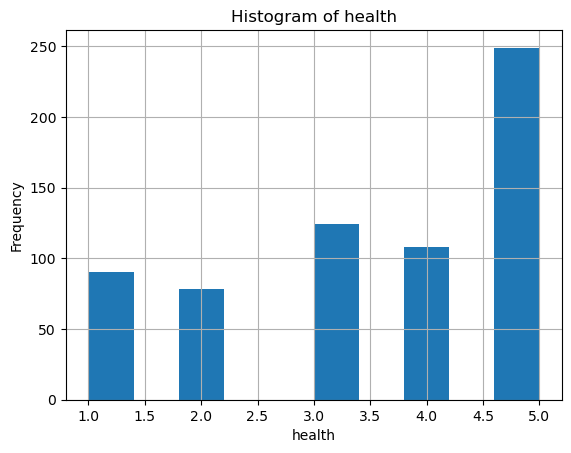

Column 'absences' mean: 3.6594761171032357
Column 'absences' maximum: 32
Column 'absences' minimum: 0
Column 'absences' distribution: Left-skewed


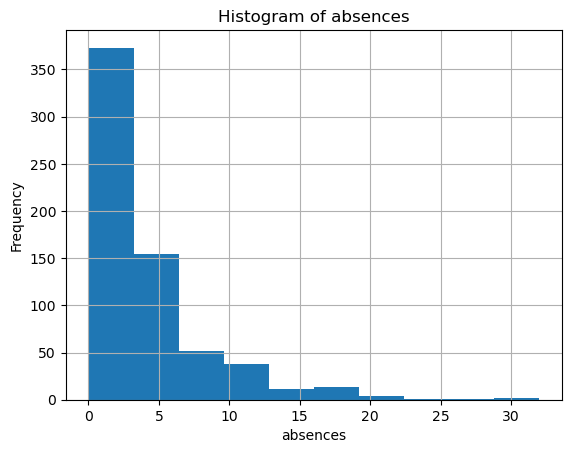

Column 'G1' mean: 11.399075500770415
Column 'G1' maximum: 19
Column 'G1' minimum: 0
Column 'G1' distribution: Normal


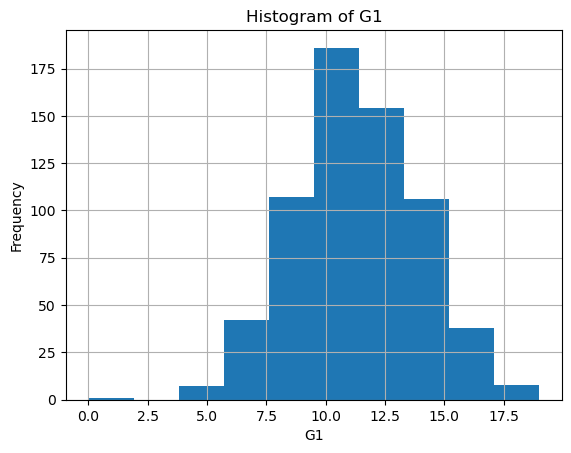

Column 'G2' mean: 11.570107858243452
Column 'G2' maximum: 19
Column 'G2' minimum: 0
Column 'G2' distribution: Normal


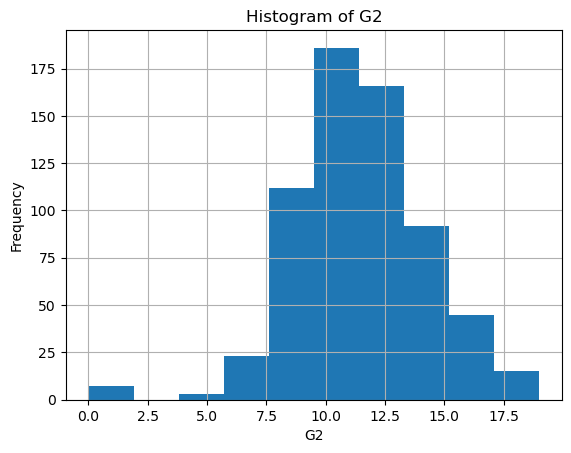

Column 'G3' mean: 11.906009244992296
Column 'G3' maximum: 19
Column 'G3' minimum: 0
Column 'G3' distribution: Right-skewed
Column 'G3' distribution: Normal


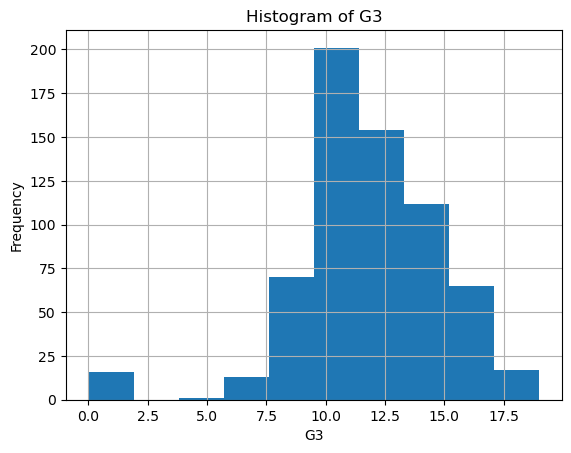

In [39]:
# iv) Compute the mode of categorical cols, compute the mean (average), max, and min values, as well as
#     a histogram of the numerical columns, being sure to comment on what kind of distribution it is (normal, multi-modal, etc.)

# since there are categorical values as well, I will have to account for those cases using an if statement.
# Compute stats
for col in student_performance.columns:
    if student_performance[col].dtype != 'object':
        # Calculating values
        print(f"Column '{col}' mean: {student_performance[col].mean()}")
        print(f"Column '{col}' maximum: {student_performance[col].max()}")
        print(f"Column '{col}' minimum: {student_performance[col].min()}")
        if skew(student_performance[col]) < -.5: # |.5| is an arbitrary margin of error
            print(f"Column '{col}' distribution: Right-skewed")
        if skew(student_performance[col]) > .5:
            print(f"Column '{col}' distribution: Left-skewed")
        else:
            print(f"Column '{col}' distribution: Normal")

        # Histogram
        plt.hist(student_performance[col])
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
        
# vi) Plot bar plots for categorical columns and comment on whether the data set is balanced in terms of the representation of the 
#     various labels in the categorical columns
    
    else:
        # Mode
        mode = student_performance[col].value_counts().mode()  
        print(f"The mode for the values in {col} is {mode}. \n")
        
        # Bar chart
        plt.bar(student_performance[col].unique(), student_performance[col].value_counts())
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
        